In [1]:
!python -V

Python 3.9.7


# Racims Rule

In [57]:
import os
import pandas as pd
import numpy as np
import pandas
import json

# spacy module
import spacy
nlp = spacy.load("en_core_web_lg")
from scipy.stats import rankdata

# plot module
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
# import data annotation with hateful type
dev_seen=pd.read_json("annotations/dev_seen.jsonl", lines = True)
dev_unseen=pd.read_json("annotations/dev_unseen.jsonl", lines = True)
test_seen=pd.read_json("annotations/test_seen.jsonl", lines = True)
train=pd.read_json("annotations/train.jsonl", lines = True)
test_unseen=pd.read_json("annotations/test_unseen.jsonl", lines = True)
test_unseen_=pd.read_json("annotations/test_unseen.jsonl", lines = True)




to_concat = [dev_seen, test_seen, train, test_unseen, dev_unseen]
hateful_memes = pd.concat(to_concat)

In [160]:
targets=pd.read_csv("ensembled_dev_seen_SA.csv")

In [164]:
!pwd

/Users/jl/Desktop/TFM/approach_TFM/results_analysis


In [249]:
data_path = "/Users/jl/Desktop/TFM/approach_TFM/results_analysis/"


dev, test, test_unseen = [], [], []
dev_probas, test_probas, test_unseen_probas = {}, {}, {} # Never dynamically add to a pd Dataframe


for csv in sorted(os.listdir(data_path)):
    if ".csv" in csv:
        if ("dev" in csv) or ("val" in csv):
            # print("Included in Simple Average: ", csv, auc_score(test_unseen_org, pd.read_csv(data_path + csv)))
            dev.append(pd.read_csv(data_path + csv))
            dev_probas[csv[:-8]] = pd.read_csv(data_path + csv).proba.values

In [175]:
len(pd.DataFrame(test_unseen_probas).columns)

2

In [254]:
dev_probas=pd.DataFrame(dev_probas)
preds = test_unseen.copy()

In [216]:
test_unseen_probas

,EnsembleV1_dev_see,ensembled_dev_see
0,0.617333,-1.528286
1,0.361333,-4.127587
2,0.670000,-0.866048
3,0.307333,-4.195083
4,0.982000,5.156360
...,...,...
495,0.205333,-4.900357
496,0.054000,-5.721004
497,0.211333,-4.939563
498,0.162667,-4.887284


In [228]:
(test_unseen_probas['EnsembleV1_dev_see'] + test_unseen_probas['ensembled_dev_see'])/2

0     -0.455476
1     -1.883127
2     -0.098024
3     -1.943875
4      3.069180
         ...   
495   -2.347512
496   -2.833502
497   -2.364115
498   -2.362309
499   -2.235886
Length: 500, dtype: float64

In [232]:
preds[0].iloc[:,1]

0      0.617333
1      0.361333
2      0.670000
3      0.307333
4      0.982000
         ...   
495    0.205333
496    0.054000
497    0.211333
498    0.162667
499    0.240667
Name: proba, Length: 500, dtype: float64

In [236]:
power = 1
weights = None
targets=pd.DataFrame(test_unseen_probas)


if weights is None:
    weights = len(targets.columns) * [1.0 / len(targets.columns)]

preds = preds[0]
preds.iloc[:,1] = np.zeros(len(preds))


for i in range(len(targets.columns)):
    print(np.add(preds.iloc[:, 1], weights[i] * (targets.iloc[:, i].astype(float)**power)))

0      0.308667
1      0.180667
2      0.335000
3      0.153667
4      0.491000
         ...   
495    0.102667
496    0.027000
497    0.105667
498    0.081333
499    0.120333
Length: 500, dtype: float64
0     -0.764143
1     -2.063793
2     -0.433024
3     -2.097542
4      2.578180
         ...   
495   -2.450178
496   -2.860502
497   -2.469781
498   -2.443642
499   -2.356220
Length: 500, dtype: float64


In [237]:
preds = test_unseen.copy()

In [238]:
power = 1
weights = None
targets=pd.DataFrame(test_unseen_probas)


if weights is None:
    weights = len(targets.columns) * [1.0 / len(targets.columns)]

preds = preds[0]
for i in range(len(targets.columns)):
    preds.iloc[:,1] = np.add(preds.iloc[:, 1], weights[i] * (targets.iloc[:, i].astype(float)**power))

In [239]:
preds

,id,proba,label
0,8291,-0.455476,1
1,46971,-1.883127,0
2,3745,-0.098024,1
3,83745,-1.943875,0
4,80243,3.069180,1
...,...,...,...
495,83675,-2.347512,0
496,37198,-2.833502,0
497,48670,-2.364115,0
498,9863,-2.362309,0


In [240]:
def rank_average(subs, weights=None):
    """
    subs: list of submission dataframes with two columns (id, value)
    weights: per submission weights; default is equal weighting 
    """
    if weights is None:
        weights = len(subs) * [1.0 / len(subs)]
    else:
        weights = weights / np.sum(weights)
    preds = subs[0].copy()
    preds.iloc[:,1] = np.zeros(len(subs[0]))
    for i, sub in enumerate(subs):
        preds.iloc[:,1] = np.add(preds.iloc[:,1], weights[i] * rankdata(sub.iloc[:,1]) / len(sub))
        
    return preds

In [262]:
for i, sub in enumerate(dev):
    print(len(sub))

500
500


In [245]:
os.listdir(data_path)

['dev_seen.jsonl',
 '.DS_Store',
 'EnsembleV1_dev_seen_RA.csv',
 'annotations_with_tag_type',
 'racism_rule_analyst.ipynb',
 'ensembled_dev_seen_SA.csv',
 'dev_seen_htype.json',
 'csv_freq_words',
 'annotations',
 'hateful_analysis.ipynb',
 'annotations_fairface.json',
 '.ipynb_checkpoints',
 'Predictions_Analysis.ipynb',
 'Find text and images duplicates-Confunders.ipynb']

In [250]:
for csv in sorted(os.listdir(data_path)):
    if "dev_seen" in csv:
        test_unseen_RA = rank_average(dev)

In [257]:
dev_probas

,EnsembleV1_dev_see,ensembled_dev_see
0,0.617333,-1.528286
1,0.361333,-4.127587
2,0.670000,-0.866048
3,0.307333,-4.195083
4,0.982000,5.156360
...,...,...
495,0.205333,-4.900357
496,0.054000,-5.721004
497,0.211333,-4.939563
498,0.162667,-4.887284


In [285]:
((dev_probas.iloc[:,1]))

0     -1.528286
1     -4.127587
2     -0.866048
3     -4.195083
4      5.156360
         ...   
495   -4.900357
496   -5.721004
497   -4.939563
498   -4.887284
499   -4.712439
Name: ensembled_dev_see, Length: 500, dtype: float64

In [271]:
(rankdata(dev_probas.iloc[:,0])/500)

array([0.628, 0.342, 0.686, 0.291, 0.99 , 0.816, 0.437, 0.104, 0.214,
       0.74 , 0.574, 0.974, 0.715, 0.856, 0.67 , 0.97 , 0.39 , 0.722,
       0.976, 0.452, 0.69 , 0.808, 0.948, 0.858, 0.566, 0.652, 0.702,
       0.02 , 0.437, 0.492, 0.635, 0.992, 0.82 , 0.44 , 0.934, 0.228,
       0.356, 0.972, 0.1  , 0.862, 0.818, 0.59 , 0.602, 0.834, 0.906,
       0.876, 0.544, 0.468, 0.883, 0.85 , 0.456, 0.442, 0.222, 0.87 ,
       0.852, 0.782, 0.588, 0.399, 0.646, 0.997, 0.256, 0.337, 0.64 ,
       0.026, 0.921, 0.49 , 0.597, 0.481, 0.534, 0.178, 0.984, 0.844,
       0.726, 0.698, 0.01 , 0.568, 0.156, 0.964, 0.481, 0.064, 0.052,
       0.414, 0.654, 0.822, 0.657, 0.216, 0.048, 0.346, 0.978, 0.012,
       0.71 , 0.249, 0.233, 0.084, 0.648, 0.832, 0.732, 0.997, 0.014,
       0.621, 0.405, 0.776, 0.898, 0.609, 0.536, 0.352, 0.494, 0.395,
       0.392, 0.529, 0.778, 0.5  , 0.6  , 0.768, 0.274, 0.76 , 0.57 ,
       0.794, 0.412, 0.988, 0.194, 0.337, 0.022, 0.14 , 0.526, 0.424,
       0.151, 0.304,

In [269]:
(rankdata(dev_probas.iloc[:,1])/500)

array([0.616, 0.314, 0.664, 0.298, 0.992, 0.818, 0.44 , 0.11 , 0.278,
       0.756, 0.55 , 0.97 , 0.69 , 0.864, 0.65 , 0.958, 0.366, 0.71 ,
       0.966, 0.436, 0.692, 0.796, 0.924, 0.876, 0.532, 0.68 , 0.696,
       0.026, 0.47 , 0.468, 0.674, 0.99 , 0.812, 0.416, 0.926, 0.218,
       0.334, 0.956, 0.126, 0.882, 0.824, 0.632, 0.614, 0.852, 0.898,
       0.872, 0.508, 0.448, 0.89 , 0.856, 0.418, 0.77 , 0.212, 0.866,
       0.834, 0.804, 0.59 , 0.404, 0.666, 1.   , 0.26 , 0.32 , 0.642,
       0.022, 0.902, 0.582, 0.624, 0.504, 0.506, 0.236, 0.984, 0.858,
       0.708, 0.684, 0.002, 0.574, 0.172, 0.954, 0.536, 0.096, 0.082,
       0.77 , 0.652, 0.86 , 0.636, 0.188, 0.062, 0.296, 0.974, 0.008,
       0.688, 0.428, 0.248, 0.036, 0.618, 0.81 , 0.716, 0.996, 0.014,
       0.586, 0.394, 0.762, 0.892, 0.604, 0.486, 0.374, 0.466, 0.422,
       0.384, 0.488, 0.752, 0.48 , 0.606, 0.76 , 0.268, 0.77 , 0.566,
       0.788, 0.396, 0.988, 0.214, 0.316, 0.024, 0.186, 0.496, 0.406,
       0.162, 0.276,

In [251]:
test_unseen_RA

,id,proba,label
0,8291,0.6220,1
1,46971,0.3280,0
2,3745,0.6750,1
3,83745,0.2945,0
4,80243,0.9910,1
...,...,...,...
495,83675,0.1980,0
496,37198,0.0320,0
497,48670,0.1950,0
498,9863,0.1720,0


## Applying Racims Rule to all dataset

In [18]:
meme_anno_path = "annotations"


meme_anno_train = {}
anno_file_train = os.path.join(meme_anno_path, 'train.jsonl')
with open(anno_file_train, 'r') as f:
    for l in f:
        data = json.loads(l)
        meme_anno_train[data['id']] = data

meme_anno_test_unseen = {}
anno_file_test_unseen = os.path.join(meme_anno_path, 'test_unseen.jsonl')
with open(anno_file_test_unseen, 'r') as f:
    for l in f:
        data = json.loads(l)
        meme_anno_test_unseen[data['id']] = data

meme_anno_test = {}
anno_file_test = os.path.join(meme_anno_path, 'test_seen.jsonl')
with open(anno_file_test, 'r') as f:
    for l in f:
        data = json.loads(l)
        meme_anno_test[data['id']] = data

meme_anno_dev = {}
anno_file_dev = os.path.join(meme_anno_path, 'dev_seen.jsonl')
with open(anno_file_dev, 'r') as f:
    for l in f:
        data = json.loads(l)
        meme_anno_dev[data['id']] = data
        
meme_anno_dev_unseen = {}
anno_file_dev_unseen = os.path.join(meme_anno_path, 'dev_unseen.jsonl')
with open(anno_file_dev_unseen, 'r') as f:
    for l in f:
        data = json.loads(l)
        meme_anno_dev_unseen[data['id']] = data

# join org annotations files

meme_anno = {**meme_anno_test_unseen, **meme_anno_test, 
             **meme_anno_dev, **meme_anno_dev_unseen,
             **meme_anno_train}

In [145]:
keyword = ['crime', 'hang', 'rob', 'steal', 'jail', 'prison', 'slave', 'apes', 'criminal', 'gorilla',
'black', 'islam', 'muslim']
keyword_tok = list(nlp(' '.join(keyword)))

rasicm_sample_idx = []
for i, (id, anno) in enumerate(meme_anno.items()):
    match = any([
    any([token.similarity(kwt) > 0.9 for kwt in keyword_tok])
        for token in nlp(anno['text'])
])
    if match:
        rasicm_sample_idx.append(id)

/var/folders/pv/21djj0qj50v927yf9fbqsnsh0000gn/T/ipykernel_77693/30057741.py:8: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  any([token.similarity(kwt) > 0.9 for kwt in keyword_tok])


In [146]:
len(rasicm_sample_idx)

1032

In [147]:
filefairface = "annotations/fairface.json"

# detect race = 'black'
fairface_ = pd.read_json(filefairface)

fairface_anno = []
for i in range(len(fairface_['id'])):
    if('Black' in fairface_.loc[i]['face_race4']):
        fairface_anno.append(str(fairface_.loc[i]['id']))

# print("fairface_anno:", (fairface_anno))
# check match in annotations text and fairface 'black'
racism_results = []
for i in range(len(fairface_anno)):
    if fairface_anno[i] in rasicm_sample_idx:
        racism_results.append(fairface_anno[i])

#print("match", racism_results)
# change proba to 1 if racism de

In [148]:
for indx in racism_results:
    if int(indx) in hateful_memes['id'].values:
        hateful_memes.at[int(hateful_memes.index[hateful_memes['id']==int(indx)].values), 'label_rr'] = 1.0
    else:
        hateful_memes.at[int(hateful_memes.index[hateful_memes['id']==int(indx)].values), 'label_rr'] = 0.0

In [149]:
len(racism_results)

239

In [141]:
hateful_memes.shape

(12540, 5)

In [150]:
clear_hm=hateful_memes[hateful_memes['label_rr'].isnull() != True]

## Correlation Matrix racism_rule vs real label 1

In [143]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(clear_hm['label'], clear_hm['label_rr'])

<AxesSubplot:>

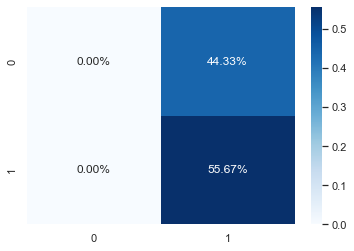

In [151]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [99]:
clear_hm['label']=clear_hm['label'].map(lambda x: 1.0 if( x==1 ) else 0.0)

/var/folders/pv/21djj0qj50v927yf9fbqsnsh0000gn/T/ipykernel_77693/1910824154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clear_hm['label']=clear_hm['label'].map(lambda x: 1.0 if( x==1 ) else 0.0)


In [108]:
clear_hm['label_rr']=clear_hm['label_rr'].map(lambda x: 1 if( x==1.0 ) else 0)

/var/folders/pv/21djj0qj50v927yf9fbqsnsh0000gn/T/ipykernel_77693/1421980014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clear_hm['label_rr']=clear_hm['label_rr'].map(lambda x: 1 if( x==1.0 ) else 0)


In [130]:
df_corr = pd.DataFrame()
df_corr['proba'] = clear_hm['prob']
df_corr['label_rr'] = clear_hm['label_rr']
df_corr

KeyError: 'prob'

In [102]:
sum(df_corr['label'] == df_corr['label_rr'])

164

In [114]:
df_corr.corr(method='pearson')

,label,label_rr
label,1.0,NaN
label_rr,NaN,NaN


In [71]:
df_corr = pd.DataFrame()

In [127]:
(df_corr).corr()

,label,label_rr
label,1.0,NaN
label_rr,NaN,NaN


In [58]:
plt.figure(figsize=(14,8))

sns.set_theme(style="white")
corr = df_corr.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

TypeError: corr() missing 1 required positional argument: 'other'

<Figure size 1008x576 with 0 Axes>